### Import some useful modules

In [ ]:
# Below code found at https://github.com/jupyterlite/jupyterlite/issues/119
import pandas as pd 
import matplotlib.pyplot as plt
import micropip
package_url = "https://raw.githubusercontent.com/innovationOUtside/ouseful_jupyterlite_utils/main/ouseful_jupyterlite_utils-0.0.1-py3-none-any.whl"
await micropip.install(package_url)
from ouseful_jupyterlite_utils import pandas_utils as pdu


### Import the CSV file containing spectra data

In [71]:
filename = "FTIR_Spectra_olive_oils.csv"
df_oils = await pdu.read_csv_local(filename, ",")
df_oils

,Sample Number:,1,1.1,2,2.1,3,3.1,4,4.1,5,...,56,56.1,57,57.1,58,58.1,59,59.1,60,60.1
0,Group Code:,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
1,Wavenumbers,Greece,Greece,Greece,Greece,Greece,Greece,Greece,Greece,Greece,...,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain
2,798.892,0.127523009,0.126498181,0.130411785,0.130022227,0.128601989,0.128217254,0.126174933,0.126466053,0.127060105,...,0.128081486,0.127703821,0.127753276,0.12689499,0.126701768,0.126685314,0.130538546,0.128416816,0.13099101,0.130263968
3,800.8215,0.127949615,0.127130974,0.130675401,0.130406662,0.128789565,0.128282253,0.126732773,0.126915413,0.127551128,...,0.128827468,0.128164684,0.127986509,0.12721772,0.127097751,0.127238698,0.130680936,0.128996456,0.131317107,0.130737854
4,802.751,0.129282219,0.128510777,0.13201661,0.132018029,0.130022276,0.129636635,0.128243765,0.128254118,0.128899981,...,0.130061537,0.129522343,0.129284594,0.128557439,0.128209423,0.128392346,0.131650943,0.130232478,0.132793931,0.131845175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,1889.0895,0.011884137,0.005719519,0.007176312,0.005507195,0.010287073,0.006853915,0.003007414,0.006176513,0.006214588,...,0.007801798,0.006796457,0.004369403,0.00502613,0.004276302,0.008257007,0.01478442,0.008254526,0.004211551,0.007815295
568,1891.019,0.0117163,0.005517707,0.006843001,0.005346649,0.010126793,0.006878347,0.002926514,0.00585748,0.005958533,...,0.00760705,0.006790252,0.004141272,0.00490346,0.004057129,0.007984346,0.014575663,0.008009579,0.003964877,0.007742453
569,1892.9485,0.01158336,0.005493693,0.006551175,0.005348955,0.009965776,0.006665717,0.002907333,0.005961917,0.00587548,...,0.007597172,0.006793539,0.004088484,0.004977476,0.003953723,0.007904781,0.014534778,0.007841174,0.003958555,0.007647386
570,1894.878,0.011314732,0.005320967,0.006398361,0.005132594,0.009759838,0.006454111,0.002832912,0.005897283,0.005708293,...,0.007550864,0.00644247,0.003922585,0.004949015,0.003863191,0.007819351,0.0142012,0.007686667,0.003938754,0.00748402


### Clean up the data in preparation for plotting

In [72]:
# drop the first two rows
rows_to_drop = [0,1]
df_oils_edit=df_oils.drop(rows_to_drop)

# give a better name to the wave number column
df_oils_edit = df_oils_edit.rename(columns={'Sample Number:': 'wavenum'})


### Plot 

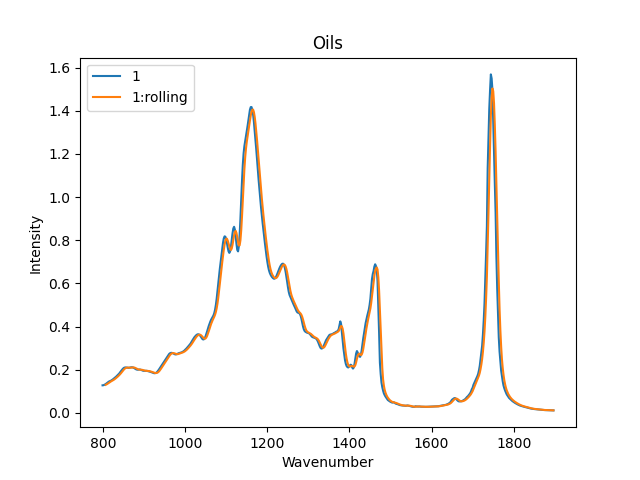

In [74]:
# use wavenumber column as x
x = pd.to_numeric(df_oils_edit["wavenum"])

# use sample #1 column as y
y = pd.to_numeric(df_oils_edit["1"])

plt.plot(x,y,label="1")

# also generate a rolling average
window_size=5
y_roll=pd.to_numeric(df_oils_edit["1"]).rolling(window_size).mean()

plt.plot(x,y_roll,label="1:rolling")

plt.xlabel("Wavenumber")
plt.ylabel("Intensity")
plt.legend()
plt.title("Oils")
plt.show()

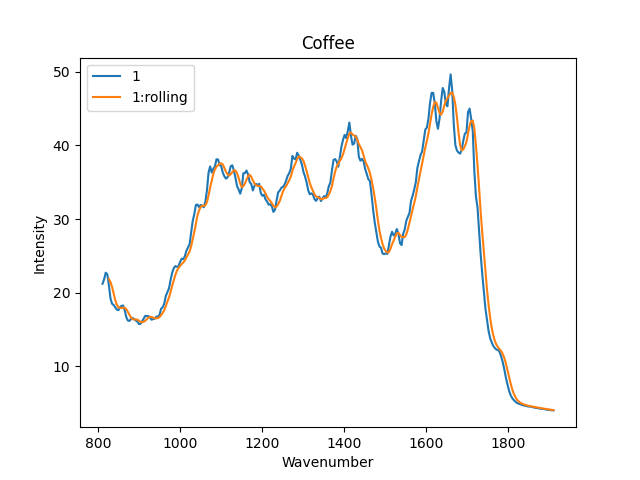

In [75]:
filename = "FTIR_Spectra_instant_coffee.csv"
df_coffee = await pdu.read_csv_local(filename, ",")

# drop the first two rows
rows_to_drop = [0,1]
df_coffee_edit=df_coffee.drop(rows_to_drop)

# give a better name to the wave number column
df_coffee_edit = df_coffee_edit.rename(columns={'Sample Number:': 'wavenum'})

# use wavenumber column as x
x = pd.to_numeric(df_coffee_edit["wavenum"])

# use sample #1 column as y
y = pd.to_numeric(df_coffee_edit["1"])

plt.plot(x,y,label="1")

# also generate a rolling average
window_size=5
y_roll=pd.to_numeric(df_coffee_edit["1"]).rolling(window_size).mean()

plt.plot(x,y_roll,label="1:rolling")

plt.xlabel("Wavenumber")
plt.ylabel("Intensity")
plt.title("Coffee")
plt.legend()
plt.show()

### Programma data from different files

In [100]:
async def plotSampleNum(filename,column,figureNum):
    #filename = "FTIR_Spectra_instant_coffee.csv"
    df = await pdu.read_csv_local(filename, ",")

    # drop the first two rows
    rows_to_drop = [0,1]
    df_edit=df.drop(rows_to_drop)

    # give a better name to the wave number column
    df_edit = df_edit.rename(columns={'Sample Number:': 'wavenum'})

    # use wavenumber column as x
    x = pd.to_numeric(df_edit["wavenum"])

    # use sample #1 column as y
    y = pd.to_numeric(df_edit[column])

    plt.figure(figureNum)
    plt.plot(x,y,label=filename+":"+column)
   

FTIR_Spectra_instant_coffee.csv
FTIR_Spectra_olive_oils.csv


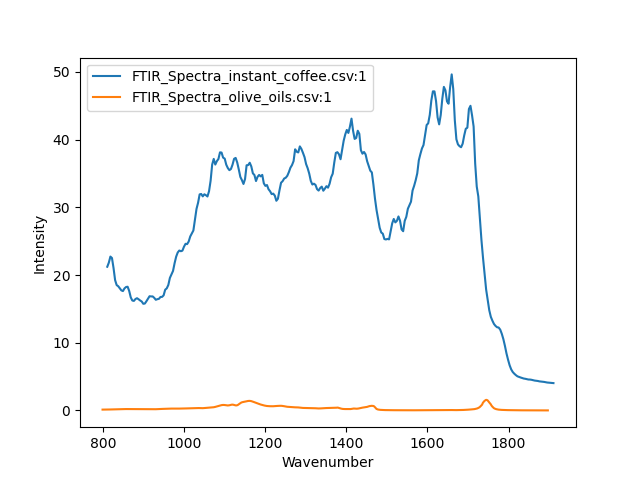

In [101]:
figureNum=3
plt.figure(figureNum)

filenames=["FTIR_Spectra_instant_coffee.csv","FTIR_Spectra_olive_oils.csv"]

for i in range(0,2):
    column="1"
    filename=filenames[i]
    print(filename)
    await plotSampleNum(filename,column,figureNum)

plt.xlabel("Wavenumber")
plt.ylabel("Intensity")
plt.legend()
plt.show()